In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercice 1.2 : Tableau de bord météorologique

**Contexte :** Créez un tableau de bord météorologique pour analyser les données climatiques.

**Consignes :**
1. Figure avec 4 subplots (2x2)
2. **Subplot 1** : Histogramme de la distribution des températures
3. **Subplot 2** : Barres du niveau de précipitations par région
4. **Subplot 3** : Scatter (Humidité vs Température)
5. **Subplot 4** : Pie chart de la répartition des types de temps

In [23]:
np.random.seed(456)
n_jours = 200

temperatures = np.random.normal(18, 8, n_jours)
temperatures = np.clip(temperatures, -5, 35)

regions = ['Nord', 'Sud', 'Est', 'Ouest', 'Centre']
precipitations_par_region = [450, 280, 320, 520, 360]

humidite = np.random.randint(30, 95, n_jours)
temperatures_humidite = 15 + humidite * 0.15 + np.random.normal(0, 3, n_jours)

types_temps = ['Ensoleillé', 'Nuageux', 'Pluvieux', 'Orageux']
repartition_temps = [35, 40, 20, 5]

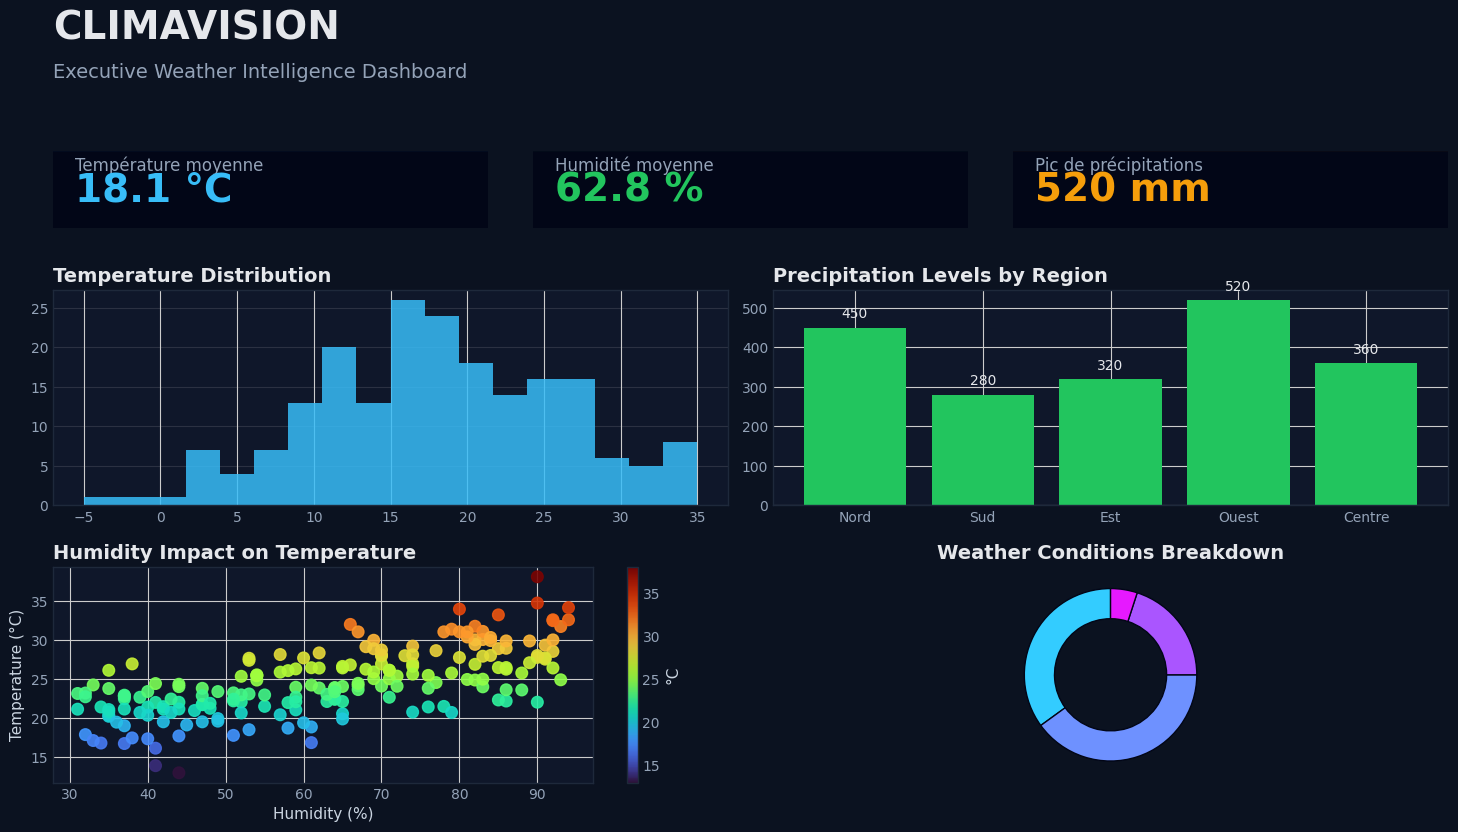

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch

# =============================
# THEME CINÉMATIQUE
# =============================
plt.rcParams.update({
    "figure.facecolor": "#0B1220",
    "axes.facecolor": "#0F172A",
    "axes.edgecolor": "#1E293B",
    "axes.labelcolor": "#CBD5E1",
    "xtick.color": "#94A3B8",
    "ytick.color": "#94A3B8",
    "text.color": "#E5E7EB",
    "font.family": "DejaVu Sans"
})

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(6, 12, hspace=0.8, wspace=0.6)

# =============================
# HEADER
# =============================
ax_header = fig.add_subplot(gs[0, :])
ax_header.axis("off")
ax_header.text(0, 0.65, "CLIMAVISION", fontsize=28, fontweight="bold")
ax_header.text(0, 0.15, "Executive Weather Intelligence Dashboard", fontsize=14, color="#94A3B8")

# =============================
# KPI CARDS
# =============================
def kpi_card(ax, title, value, unit, color):
    ax.axis("off")
    card = FancyBboxPatch(
        (0, 0), 1, 1,
        boxstyle="round,pad=0.02,rounding_size=20",
        facecolor="#020617",
        edgecolor=color,
        linewidth=2
    )
    ax.add_patch(card)
    ax.text(0.05, 0.75, title, fontsize=12, color="#94A3B8")
    ax.text(0.05, 0.35, f"{value} {unit}", fontsize=28, fontweight="bold", color=color)

kpi_card(fig.add_subplot(gs[1, 0:4]), "Température moyenne", f"{np.mean(temperatures):.1f}", "°C", "#38BDF8")
kpi_card(fig.add_subplot(gs[1, 4:8]), "Humidité moyenne", f"{np.mean(humidite):.1f}", "%", "#22C55E")
kpi_card(fig.add_subplot(gs[1, 8:12]), "Pic de précipitations", f"{max(precipitations_par_region)}", "mm", "#F59E0B")

# =============================
# TEMPERATURE DISTRIBUTION
# =============================
ax1 = fig.add_subplot(gs[2:4, 0:6])
ax1.hist(
    temperatures,
    bins=18,
    color="#38BDF8",
    alpha=0.85
)
ax1.set_title("Temperature Distribution", loc="left", fontsize=14, fontweight="bold")
ax1.grid(axis="y", alpha=0.15)

# =============================
# PRECIPITATIONS BAR
# =============================
ax2 = fig.add_subplot(gs[2:4, 6:12])
bars = ax2.bar(
    regions,
    precipitations_par_region,
    color="#22C55E"
)
ax2.set_title("Precipitation Levels by Region", loc="left", fontsize=14, fontweight="bold")
ax2.bar_label(bars, padding=5, fontsize=10)

# =============================
# SCATTER HUMIDITY VS TEMP
# =============================
ax3 = fig.add_subplot(gs[4:6, 0:6])
sc = ax3.scatter(
    humidite,
    temperatures_humidite,
    c=temperatures_humidite,
    cmap="turbo",
    s=70,
    alpha=0.9
)
ax3.set_title("Humidity Impact on Temperature", loc="left", fontsize=14, fontweight="bold")
ax3.set_xlabel("Humidity (%)")
ax3.set_ylabel("Temperature (°C)")
plt.colorbar(sc, ax=ax3, label="°C")

# =============================
# DONUT WEATHER TYPES
# =============================
ax4 = fig.add_subplot(gs[4:6, 6:12])
colors = plt.get_cmap("cool")(np.linspace(0.2, 0.9, len(types_temps)))
ax4.pie(
    repartition_temps,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.35, edgecolor="#020617")
)
ax4.set_title("Weather Conditions Breakdown", fontsize=14, fontweight="bold")

plt.show()
